<a href="https://colab.research.google.com/github/serinss/seSAC_ML_DL_Class/blob/main/08_3_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%run my_init.py

Mounted at /content/drive
tf.__version__: 2.8.0
keras.__version__: 2.8.0


In [ ]:
%matplotlib inline

#패션 MNIST 데이터 불러오기

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_scaled = X_train.reshape(-1,28,28,1)/255.0 #데이터 2D->3D 가 60000개 인 것(그림 잘 이해하기!!!)
X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_scaled.shape, y_train.shape

((48000, 28, 28, 1), (48000,))

In [ ]:
X_val_scaled.shape

(12000, 28, 28, 1)

#합성곱 신경망 만들기

In [ ]:
model = keras.Sequential()
# 첫번째 합성곱-풀링 층
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1))) #입력층 크기, 커널 정보만 설정
model.add(keras.layers.MaxPooling2D(2))

# 이미지 - 일반적인 도형적인 특성에 대한 필터링 진행(선, 면, 등등) -> general
# 아래로 내려갈수록 special , detail 특성 필터링


# conv2d : (28,28,1)->32개 이므로 3차원은 표현하지 않음(depth정보 없으므로 위의 shape로 확인하기)
# 학습된 파라미터의 개수는 32 * 9(3*3) = 288 + 32(b) = 320개

In [ ]:
len(model.layers[0].weights)
# layers[0] = Conv2D

2

In [ ]:
model.layers[0].weights[0].shape #weights = 가중치 -> filter정보(32개의 가중치 크기)
#[3, 3, 1] -> 3x3 x1 입력을 28x28x1 로 했으니 맞춰서 나옴

TensorShape([3, 3, 1, 32])

In [ ]:
model.layers[0].weights[1].shape # filter 32개의 bias

TensorShape([32])

In [ ]:
model.layers[1]

In [ ]:
##두번째 합성곱-풀링 층
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2)) # 학습 parameter없음, FeatureMap의 size만 줄어듦

In [ ]:
model.add(keras.layers.Flatten()) #최종으로 나온 FeatureMap 을 뉴런 3136개로 flatten
model.add(keras.layers.Dense(100, activation='relu')) #100개 뉴런 은닉층
model.add(keras.layers.Dropout(0.4)) # 드롭아웃 -> 뉴런 40% 비활성화
model.add(keras.layers.Dense(10, activation='softmax')) # 10개 뉴런 출력층

In [ ]:
model.layers[2].weights[0].shape # 3*3*32*64=18432 + 64(bias) = 18496

TensorShape([3, 3, 32, 64])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

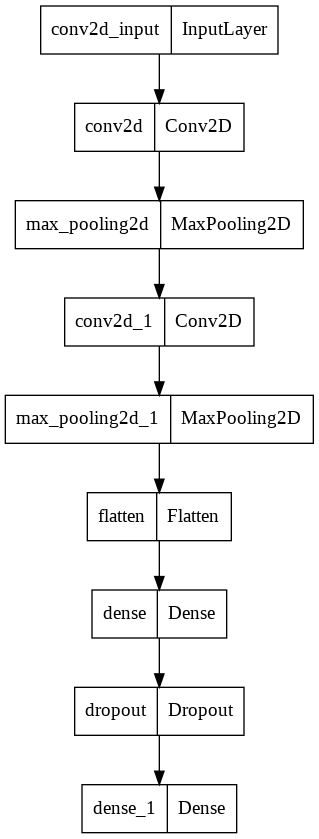

In [ ]:
keras.utils.plot_model(model)

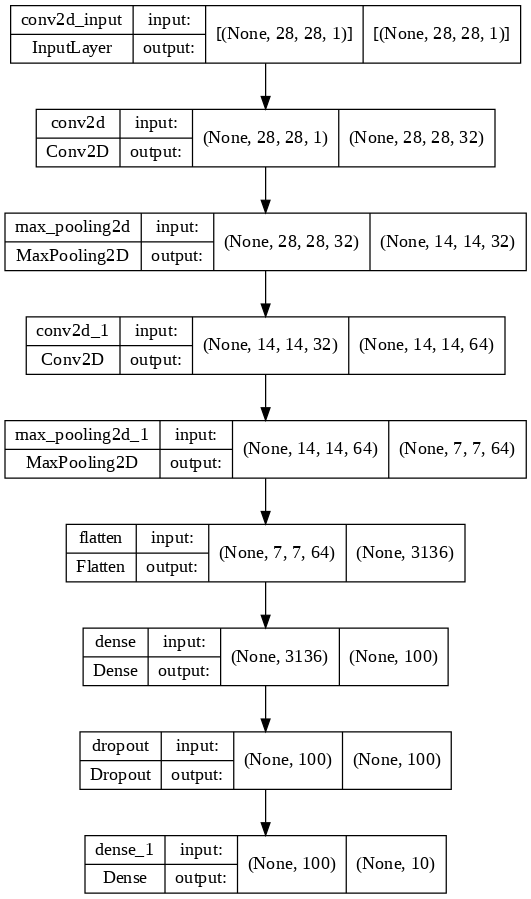

In [ ]:
keras.utils.plot_model(model, show_shapes=True, dpi=90)
# InputLayer 표시가 나온다! (Flatten 쓰지 않아도 나옴)

maxPooling2D - 까지가 CNN  
flatten - 부터 DNN

#모델 컴파일과 훈련

In [ ]:
y_train[0:1] # --> sparse_categorical_crossentropy 사용

array([7], dtype=uint8)

In [ ]:
keras.utils.to_categorical(y_train)[0:1] # one-hot-encoding --> categorical_crossentropy 사용

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_val_scaled, y_val), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 15s 4ms/step - loss: 0.5165 - accuracy: 0.8153 - val_loss: 0.3263 - val_accuracy: 0.8792
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3386 - accuracy: 0.8785 - val_loss: 0.2752 - val_accuracy: 0.8964
Epoch 3/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2889 - accuracy: 0.8944 - val_loss: 0.2596 - val_accuracy: 0.9040
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2568 - accuracy: 0.9071 - val_loss: 0.2389 - val_accuracy: 0.9133
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2342 - accuracy: 0.9142 - val_loss: 0.2331 - val_accuracy: 0.9122
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2101 - accuracy: 0.9217 - val_loss: 0.2200 - val_accuracy: 0.9191
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1957 - accuracy: 0.9278 - val_loss: 0.2227 - val_accuracy

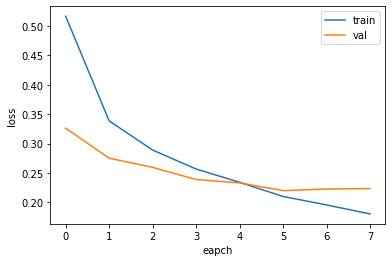

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('eapch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# epoch = 20 -> 19번까지 돌아야 하지만, early_stop = 10에서 멈췄다

# best-fit = 8 임을 알 수 있음!

In [ ]:
model.evaluate(X_val_scaled, y_val)

375/375 [==============================] - 1s 2ms/step - loss: 0.2200 - accuracy: 0.9191


[0.22004716098308563, 0.9190833568572998]

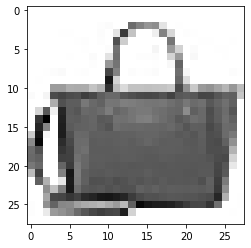

In [ ]:
plt.imshow(X_val_scaled[0].reshape(28,28), cmap='gray_r') # 3차원->2차원
plt.show()

In [ ]:
preds = model.predict(X_val_scaled[0:1]) #슬라이싱 사용 -> (1,28,28,1) 구조가 바뀌지 않도록
print(preds)

#softmax 를 통해 얻은 확률임!

[[1.01226585e-16 3.09148993e-25 3.30222867e-18 1.15665909e-20
  1.04276889e-19 5.12727274e-17 1.44152633e-17 3.43480287e-22
  1.00000000e+00 1.38396404e-21]]


In [ ]:
np.argmax(preds) # 확률이 제일 큰 값(예측값)의 인덱스

8

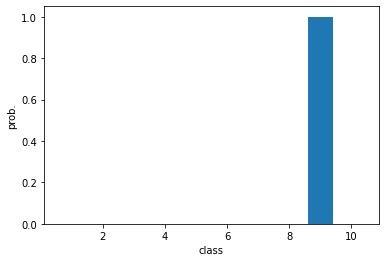

In [ ]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes = ['티셔츠', '바지', '스웨터','드레스','코드','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [ ]:
print(classes[np.argmax(preds)]) # How? CNN이 어떻게 featureMap을 만들었는지를 봐야 함 -> 뒤에서 시각화 작업

가방


In [ ]:
test_scaled = X_test.reshape(-1, 28, 28, 1)/255.0
model.evaluate(test_scaled, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2373 - accuracy: 0.9138


[0.2372887134552002, 0.9138000011444092]

# 08-3. 합성곱 신경망의 시각화(바로 이어서 진행)

#가중치 시각화

In [ ]:
model = keras.models.load_model('best-cnn-model.h5')
model.layers

In [ ]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)
# weights[0] = filter = (3,3) 32개 , [1] = bias 32개

(3, 3, 1, 32) (32,)


In [ ]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std()) # 통계량을 통해 가중치 분포를 알 수 있음

# 잘 학습했기 때문에 평균 = 0 에 수렴하고, 표준편차가 존재하는 정규분포를 따르는 것임
# 그만큼 특징(데이터의 대표성=평균, 중앙값, 분산)을 잘 뽑아냈다는 것!

-0.035129152 0.25441122


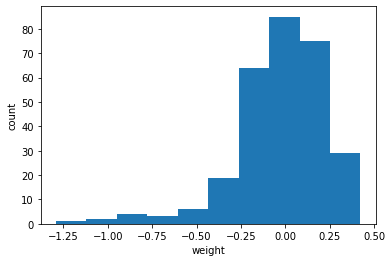

In [ ]:
plt.hist(conv_weights.reshape(-1,1)) # 연속형 데이터의 도수 분포를 그래프화
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

# weights 가중치가 종 모양 = 정규 분포 모양과 흡사
# 학습의 과정이 있었던 가중치는 이런 분포를 따른다는 것으로 해석가능

# 학습의 과정이 없었다면 uniform distribution과 같이 보임

# 최적의 가중치 값을 패턴학습 함 -> FeatureMap 생성

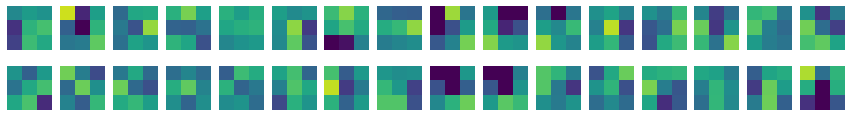

In [ ]:
#층의 가중치 시각화

fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [ ]:
# 커널 출력해보기

conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


### 학습하지 않은 모델

In [ ]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0041382355 0.08035334


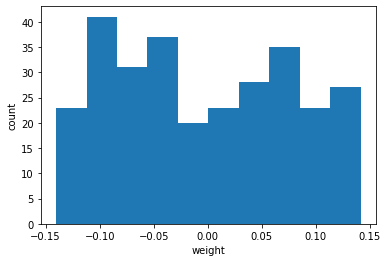

In [ ]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

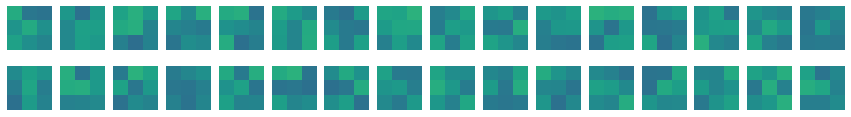

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

#함수형 API

뉴런의 수를 높이는 것보다 레이어의 개수를 늘리는 것이 성능에 더 영향을 많이 준다  
기본적으로 오버피트를 야기하므로 줄일 수 있는 선택도 같이 해야 함  
-> 드롭아웃, 조기종료 등등  
-> + 전체적인 수를 줄이는 방법 MaxPooling도 같은 효과를 일부 제공함  


####X input -> [[InputLayer -> Conv2D]] -> Feature Map  
Conv2D 의 결과인 FeatureMap을 꺼내서 predict해보기  


In [ ]:
# model = keras.models.load_moel(r'best-cnn-model.h5 경로 복사')

In [ ]:
dense1 = keras.layers.Dense(100, activation='sigmoid', name='dense1')
dense2 = keras.layers.Dense(10, activation='softmax', name='dense2')

In [ ]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [ ]:
# 함수형으로 input
inputs = keras.Input(shape=(784,), name='input')
inputs

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'input')>

In [ ]:
hidden = dense1(inputs)
hidden

<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'dense1')>

In [ ]:
outputs = dense2(hidden)
outputs

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense2')>

In [ ]:
model.input # 훈련이미지 (28,28,1)

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [ ]:
model.layers[0].output

<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d')>

In [ ]:
conv_acti = keras.Model(model.input, model.layers[0].output)
conv_acti.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


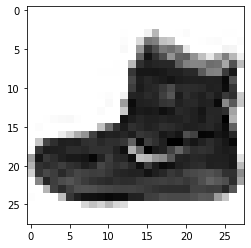

In [ ]:
plt.imshow(X_train[0], cmap='gray_r')
plt.show()

In [ ]:
inputs = X_train[0:1].reshape(-1, 28, 28, 1)/255.0
inputs.shape #샘플이 1건이므로 (1,)

(1, 28, 28, 1)

In [ ]:
feature_maps = conv_acti.predict(inputs)
feature_maps.shape #FeatureMap은 32개

(1, 28, 28, 32)

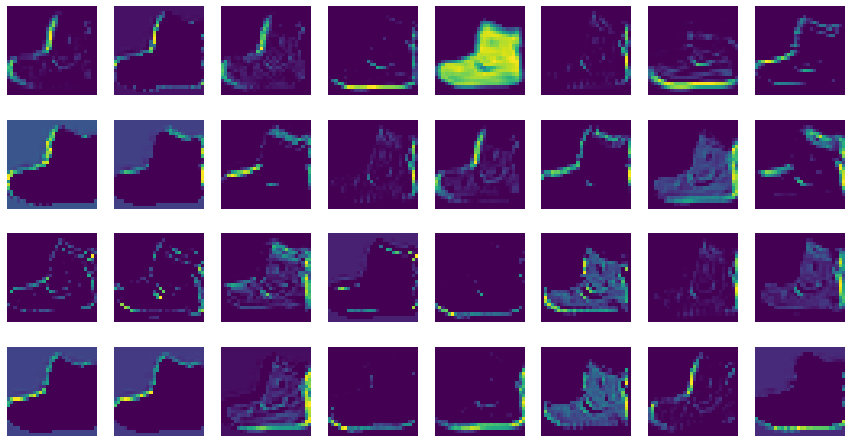

In [ ]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

In [ ]:
conv2_acti = keras.Model(model.input, model.layers[2].output)
inputs = X_train[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv2_acti.predict(inputs)
print(feature_maps.shape) # 두번째 Conv2D 사이즈 (None->1)로 바뀐 거밖에 없음! - 그림이랑 잘 이어보기

(1, 14, 14, 64)


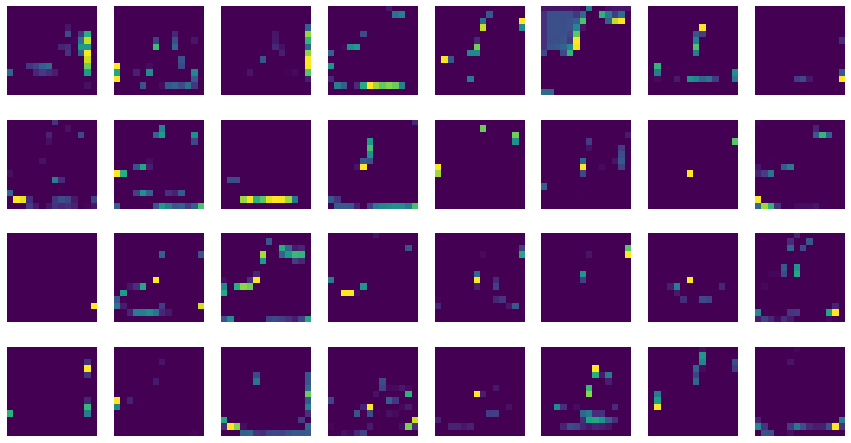

In [ ]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

# 첫번째 featureMap이 인풋이므로 알아보기 힘들다

In [ ]:
type(model)

NameError: ignored